Steps in modelling with Tensorflow:

0. Get training data ready (turn into tensors)
1. Create a model (or pick a pretrained model): define the input, output layers, and the hidden layers of a DL model;
2. Compile a model - define the loss function, the optimizer, and the evaluation metrics;
3. Fit a model (Evaluate the model) - letting the model try to find patterns between features and labels;
4. Improve the model through experimentation (Hyperparameter tuning);
5. Visualize, interpret the result and save your trained model. 

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.1.3


In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

### The three dataset
* Training dataset - the model learns from this data, typically around 70% 
* Validation dataset - the models gets tuned on this data, typically around 15%
* Test dataset - the model get evaluted on this data, typically around 15%`

In [3]:
# Set random seed
tf.random.set_seed(42)

# 0. Create data
X = np.arange(0, 100, 1, dtype='float64')
noise = 10*np.random.rand(100) 
Y = 2*X + noise

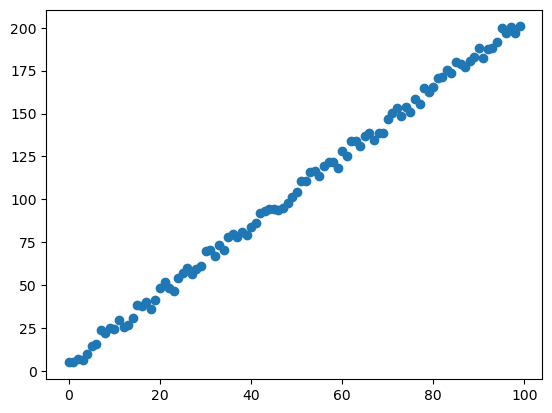

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, Y) 
plt.rcParams['figure.figsize'] = [3, 2]
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.7, random_state=42)

In [6]:
X_train.shape, Y_train.shape, X_rem.shape, Y_rem.shape

((70,), (70,), (30,), (30,))

In [7]:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=42)

In [8]:
X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((15,), (15,), (15,), (15,))

create a model which builds automatically by defining the input_shape argument in the first layer

In [9]:
# 1. Create a model using the Sequential API (Old version in Intro_Keras_1)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.Adam(lr=0.1),  
             metrics=["mae"])

#model.summary()

In [10]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer')
    #,tf.keras.layers.Dense(1, name='output_layer')
], name='A_simple_MLP_model_for_the_HAL_workshop')

# 2. Compile the model
model.compile(loss = tf.keras.losses.mse, 
             optimizer = tf.keras.optimizers.Adam(lr=0.01),  
             metrics=["mae"])

In [11]:
model.summary()

Model: "A_simple_MLP_model_for_the_HAL_workshop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
#3. Fit the model
model.fit(X_train,Y_train, epochs=400) #verbose=0

Train on 70 samples
Epoch 1/400
70/70 [==============================] - 0s 5ms/sample - loss: 7664.1287 - mae: 77.1178
Epoch 2/400
70/70 [==============================] - 0s 129us/sample - loss: 7373.7721 - mae: 75.6088
Epoch 3/400
70/70 [==============================] - 0s 134us/sample - loss: 7064.6183 - mae: 74.0559
Epoch 4/400
70/70 [==============================] - 0s 129us/sample - loss: 6776.8048 - mae: 72.5460
Epoch 5/400
70/70 [==============================] - 0s 131us/sample - loss: 6504.9176 - mae: 71.0692
Epoch 6/400
70/70 [==============================] - 0s 136us/sample - loss: 6239.9215 - mae: 69.6142
Epoch 7/400
70/70 [==============================] - 0s 133us/sample - loss: 5980.5253 - mae: 68.1766
Epoch 8/400
70/70 [==============================] - 0s 131us/sample - loss: 5724.3069 - mae: 66.7148
Epoch 9/400
70/70 [==============================] - 0s 126us/sample - loss: 5487.3830 - mae: 65.3331
Epoch 10/400
70/70 [==============================] - 0s 125us/s

70/70 [==============================] - 0s 129us/sample - loss: 44.2288 - mae: 5.8769
Epoch 82/400
70/70 [==============================] - 0s 129us/sample - loss: 40.9853 - mae: 5.6298
Epoch 83/400
70/70 [==============================] - 0s 128us/sample - loss: 38.0145 - mae: 5.3930
Epoch 84/400
70/70 [==============================] - 0s 123us/sample - loss: 35.2065 - mae: 5.1692
Epoch 85/400
70/70 [==============================] - 0s 149us/sample - loss: 32.7844 - mae: 4.9539
Epoch 86/400
70/70 [==============================] - 0s 146us/sample - loss: 30.4327 - mae: 4.7405
Epoch 87/400
70/70 [==============================] - 0s 126us/sample - loss: 28.4325 - mae: 4.5430
Epoch 88/400
70/70 [==============================] - 0s 130us/sample - loss: 26.5978 - mae: 4.3584
Epoch 89/400
70/70 [==============================] - 0s 126us/sample - loss: 24.9302 - mae: 4.1911
Epoch 90/400
70/70 [==============================] - 0s 128us/sample - loss: 23.4461 - mae: 4.0483
Epoch 91/400


70/70 [==============================] - 0s 142us/sample - loss: 10.1547 - mae: 2.6706
Epoch 163/400
70/70 [==============================] - 0s 132us/sample - loss: 10.1541 - mae: 2.6705
Epoch 164/400
70/70 [==============================] - 0s 142us/sample - loss: 10.1525 - mae: 2.6702
Epoch 165/400
70/70 [==============================] - 0s 141us/sample - loss: 10.1514 - mae: 2.6703
Epoch 166/400
70/70 [==============================] - 0s 142us/sample - loss: 10.1506 - mae: 2.6705
Epoch 167/400
70/70 [==============================] - 0s 137us/sample - loss: 10.1497 - mae: 2.6704
Epoch 168/400
70/70 [==============================] - 0s 126us/sample - loss: 10.1510 - mae: 2.6711
Epoch 169/400
70/70 [==============================] - 0s 127us/sample - loss: 10.1477 - mae: 2.6710
Epoch 170/400
70/70 [==============================] - 0s 129us/sample - loss: 10.1486 - mae: 2.6711
Epoch 171/400
70/70 [==============================] - 0s 128us/sample - loss: 10.1458 - mae: 2.6705
Epoc

70/70 [==============================] - 0s 127us/sample - loss: 10.0378 - mae: 2.6590
Epoch 244/400
70/70 [==============================] - 0s 128us/sample - loss: 10.0371 - mae: 2.6591
Epoch 245/400
70/70 [==============================] - 0s 139us/sample - loss: 10.0357 - mae: 2.6591
Epoch 246/400
70/70 [==============================] - 0s 140us/sample - loss: 10.0334 - mae: 2.6589
Epoch 247/400
70/70 [==============================] - 0s 130us/sample - loss: 10.0320 - mae: 2.6588
Epoch 248/400
70/70 [==============================] - 0s 126us/sample - loss: 10.0295 - mae: 2.6582
Epoch 249/400
70/70 [==============================] - 0s 142us/sample - loss: 10.0259 - mae: 2.6576
Epoch 250/400
70/70 [==============================] - 0s 162us/sample - loss: 10.0236 - mae: 2.6570
Epoch 251/400
70/70 [==============================] - 0s 127us/sample - loss: 10.0198 - mae: 2.6559
Epoch 252/400
70/70 [==============================] - 0s 129us/sample - loss: 10.0167 - mae: 2.6552
Epoc

70/70 [==============================] - 0s 128us/sample - loss: 9.8876 - mae: 2.6416
Epoch 325/400
70/70 [==============================] - 0s 131us/sample - loss: 9.8871 - mae: 2.6424
Epoch 326/400
70/70 [==============================] - 0s 144us/sample - loss: 9.8910 - mae: 2.6436
Epoch 327/400
70/70 [==============================] - 0s 124us/sample - loss: 9.8868 - mae: 2.6438
Epoch 328/400
70/70 [==============================] - 0s 138us/sample - loss: 9.8838 - mae: 2.6431
Epoch 329/400
70/70 [==============================] - 0s 143us/sample - loss: 9.8816 - mae: 2.6419
Epoch 330/400
70/70 [==============================] - 0s 147us/sample - loss: 9.8776 - mae: 2.6412
Epoch 331/400
70/70 [==============================] - 0s 128us/sample - loss: 9.8757 - mae: 2.6409
Epoch 332/400
70/70 [==============================] - 0s 130us/sample - loss: 9.8739 - mae: 2.6407
Epoch 333/400
70/70 [==============================] - 0s 130us/sample - loss: 9.8702 - mae: 2.6399
Epoch 334/400


In [13]:
Y_pred = model.predict(X_test)

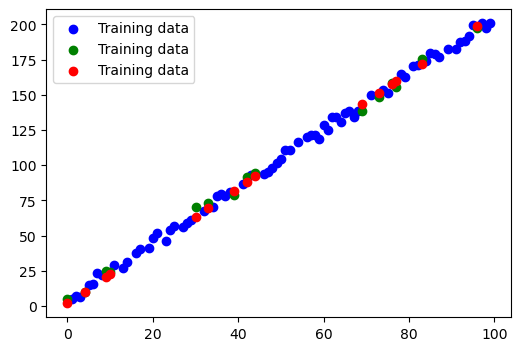

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, Y_train, c="b", label = "Training data")
plt.scatter(X_test, Y_test, c="g", label = "Training data")
plt.scatter(X_test, Y_pred, c="r", label = "Training data")
plt.legend();
plt.show()

In [15]:
# calculate some metrics to evaluate the model performance
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1464598>

In [16]:
# calculate some metrics to evaluate the model performance
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.376459>

In [17]:
# serialize and save the model that you just trained 
saved_model_path = "./saved_model/my_model" # or saved using the HDF5 format "./saved_model/my_model.h5" 
model.save(saved_model_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./saved_model/my_model/assets


In [18]:
!ls -al ./saved_model

total 291
drwxr-xr-x 3 shirui grp_202   4096 Sep 20 21:54 .
drwxr-xr-x 7 shirui grp_202   4096 Sep 21 13:23 ..
drwxr-xr-x 4 shirui grp_202   4096 Sep 21 13:24 my_model
-rw-r--r-- 1 shirui grp_202 289320 Sep 20 21:54 my_model.h5


In [19]:
# load in a pretrained model that you just saved
loaded_model = tf.keras.models.load_model("./saved_model/my_model")
loaded_model.summary()

Model: "A_simple_MLP_model_for_the_HAL_workshop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
loaded_model.predict(X_test)

array([[198.45735  ],
       [ 10.064394 ],
       [ 87.878876 ],
       [159.55011  ],
       [ 22.350891 ],
       [  1.8733963],
       [ 20.30314  ],
       [143.16812  ],
       [151.35912  ],
       [171.83661  ],
       [ 91.97438  ],
       [157.50237  ],
       [ 81.73563  ],
       [ 69.449135 ],
       [ 63.305885 ]], dtype=float32)

### Homework: Learn the Training checkpoints: https://www.tensorflow.org/guide/checkpoint